In [1]:
# import packages
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
# read in mood data
mood_data = pd.read_csv("../ProjectMainCodeFiles/mood_data_main.csv")
mood_data

,title,artist,primary,secondary
0,i hope she loves me back,boy pablo,2,3
1,Pray Slow,Chase Shakur,3,4
2,All Your Love,Jakob Ogawa,1,3
3,Looking Out For You,Joy Again,4,2
4,Feel Like A Fool,Kali Uchis,1,6
5,i want war (BUT I NEED PEACE),Kali Uchis,5,6
6,Telepatía,Kali Uchis,1,5
7,Parking Lots,Plums,5,2
8,Annie Chases a Butterfly,Silk Skin Lovers,3,4
9,Moon 1AM,Silk Skin Lovers,4,6


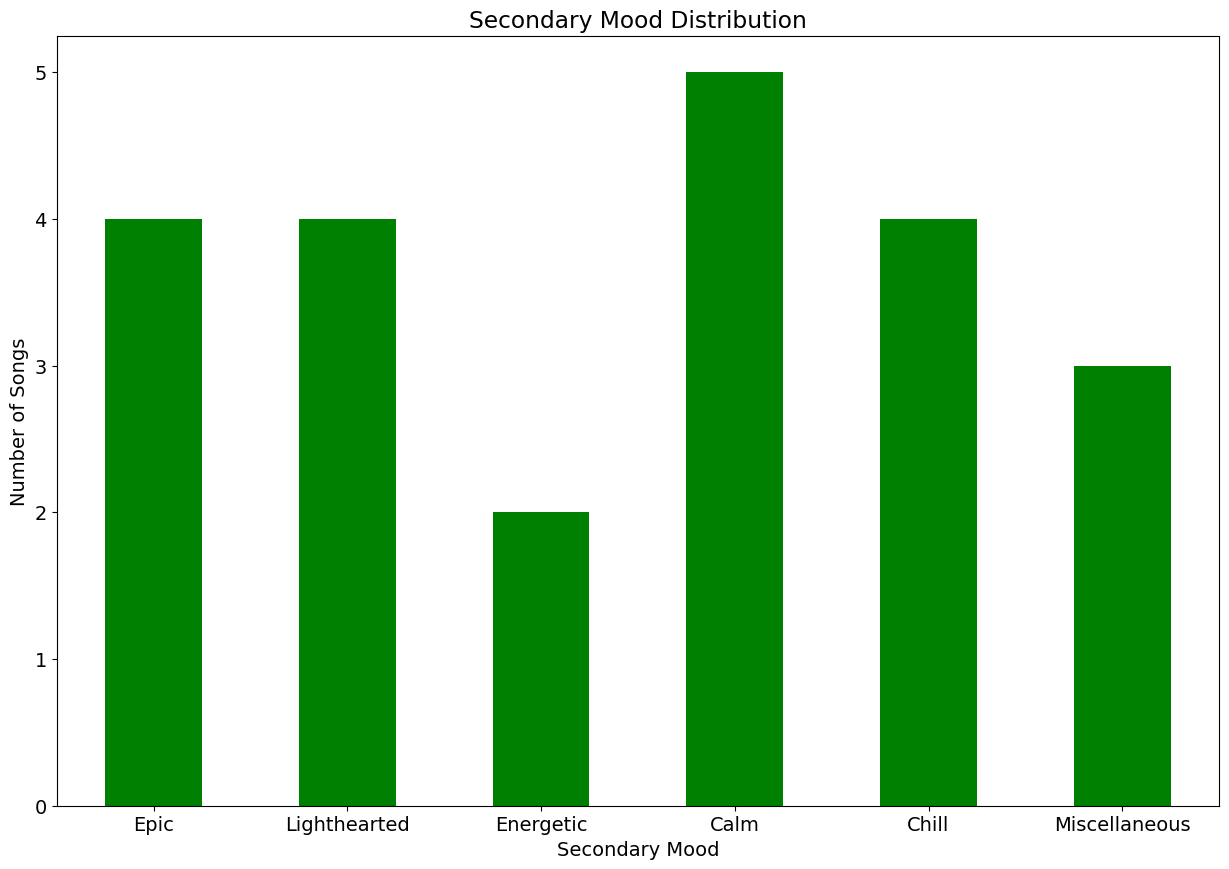

In [8]:
# pie chart for secondary mood distribution
secondary_groups = mood_data.groupby('secondary')
plt.rc('font', size=14)
ax = secondary_groups.size().plot.bar(y = 'secondary', figsize=(15, 10), color = "green", rot = 0)
ax.set_ylabel('Number of Songs')
ax.set_xlabel('Secondary Mood')
ax.set_title('Secondary Mood Distribution')
ax.set_xticklabels(('Epic', 'Lighthearted', 'Energetic', 'Calm', 'Chill', 'Miscellaneous'))
plt.savefig("secondary_dist.pdf")